In [2]:
import numpy as np
import matplotlib.pyplot as plt
from openfermion.chem import MolecularData
from openfermion.transforms import get_fermion_operator, jordan_wigner, bravyi_kitaev
from openfermion.linalg import get_sparse_operator
from openfermion.ops import FermionOperator
from openfermionpyscf import run_pyscf
from openfermion.linalg import get_ground_state, get_sparse_operator
from pyscf import fci

from tqdm import tqdm

In [11]:
basis = "sto-3g"  #basis set
multiplicity = 1  #spin multiplicity
charge = 0        #total charge for the molecule
description = "tmp"

r_list = []
energy_list = []
energy_hf_list = []

number = 101
for i in range(number):
    r = 0.1 + i*(4.0-0.1)/(number-1)
    geo = [("H",(0,0,0)),("H", (0,0,r))]
    mol = MolecularData(geo, basis, multiplicity, charge, description)
    mol = run_pyscf(mol,run_scf=1,run_fci=1)  

    r_list.append(r)
    energy_list.append(mol.fci_energy)
    energy_hf_list.append(mol.hf_energy)

In [12]:
r_min = 0
E_min = 0
index = 0

for j in range(len(energy_list)):
    if energy_list[j] < E_min:
        r_min = r_list[j]
        E_min = energy_list[j]
        index = j

print(r_min)
print(E_min)
print(index)

0.724
-1.1372031199371588
16


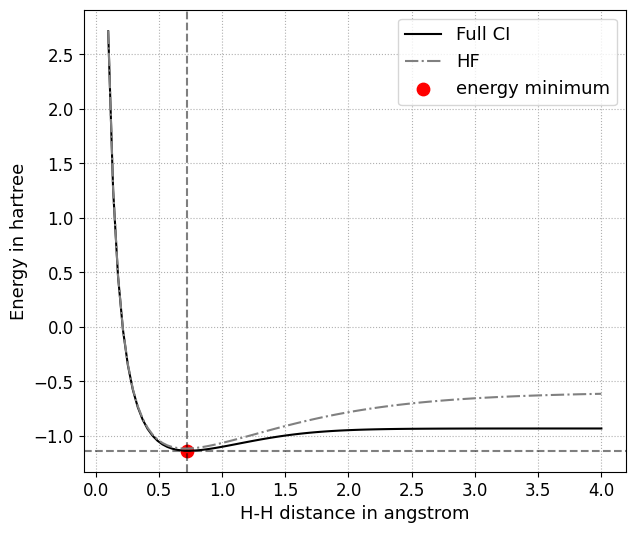

In [13]:
plt.figure(figsize=(7.0, 6.0))

plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel("H-H distance in angstrom", fontsize=13)
plt.ylabel("Energy in hartree", fontsize=13)

plt.axvline(r_min, color="black", linestyle="dashed", alpha=0.5)
plt.axhline(E_min, color="black", linestyle="dashed", alpha=0.5)

plt.plot(r_list, energy_list, color="black", linestyle="solid", label="Full CI")
plt.plot(r_list, energy_hf_list, color="gray", linestyle="dashdot", label="HF")
plt.scatter(r_min, E_min, c ="red", s=80, alpha=1.0, label="energy minimum")

plt.grid(linestyle='dotted')
plt.legend(loc='best', fontsize=13)
plt.show()

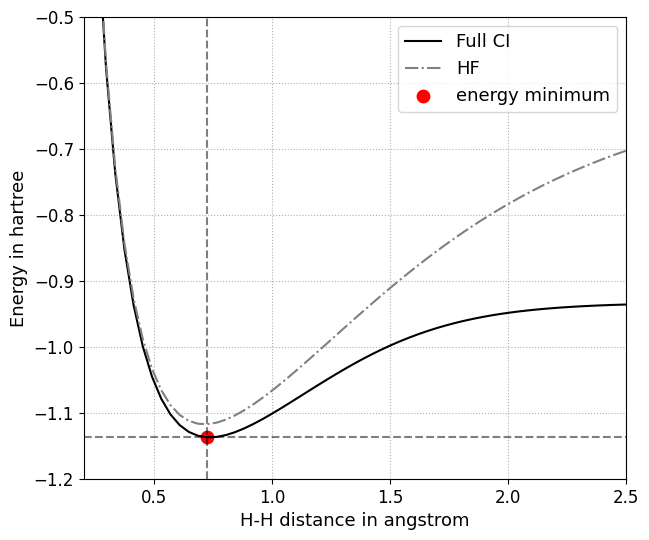

In [14]:
plt.figure(figsize=(7.0, 6.0))

xmin_plot, xmax_plot = 0.2, 2.5
ymin_plot, ymax_plot = -1.2, -0.5
plt.xlim(xmin_plot, xmax_plot)
plt.ylim(ymin_plot, ymax_plot)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel("H-H distance in angstrom", fontsize=13)
plt.ylabel("Energy in hartree", fontsize=13)

plt.axvline(r_min, color="black", linestyle="dashed", alpha=0.5)
plt.axhline(E_min, color="black", linestyle="dashed", alpha=0.5)

plt.plot(r_list, energy_list, color="black", linestyle="solid", label="Full CI")
plt.plot(r_list, energy_hf_list, color="gray", linestyle="dashdot", label="HF")
plt.scatter(r_min, E_min, c ="red", s=80, alpha=1.0, label="energy minimum")

plt.grid(linestyle='dotted')
plt.legend(loc='best', fontsize=13)
plt.show()

In [4]:
basis = "sto-3g"
multiplicity = 1
charge = 0
distance  = 0.74
geometry = [["H", [0,0,0]],["H", [0,0,distance]]]
description  = "tmp"
molecule = MolecularData(geometry, basis, multiplicity, charge, description)
molecule = run_pyscf(molecule,run_scf=1,run_fci=1)
n_qubit = molecule.n_qubits
n_electron = molecule.n_electrons
fermionic_hamiltonian = get_fermion_operator(molecule.get_molecular_hamiltonian())
jw_hamiltonian = jordan_wigner(fermionic_hamiltonian)
jw_hamiltonian.compress()

In [7]:
jw_matrix = get_sparse_operator(jw_hamiltonian)
eigenenergies, eigenvecs = np.linalg.eigh(jw_matrix.toarray())
print(eigenenergies)

sparse_hamiltonian = get_sparse_operator(jw_hamiltonian)
energy, state = get_ground_state(sparse_hamiltonian)
print(energy)

[-1.13728383 -0.53820545 -0.53820545 -0.53077336 -0.53077336 -0.53077336
 -0.44561582 -0.44561582 -0.16835243  0.24003549  0.24003549  0.3555207
  0.3555207   0.48314267  0.71510434  0.92317918]
-1.1372838344885015


In [28]:
basis = "sto-3g"  #basis set
multiplicity = 1  #spin multiplicity
charge = 0        #total charge for the molecule
description = "tmp"

r_list = []
energy_list = []
energy_diag_g_list = []
energy_diag_e1_list = []
energy_diag_e2_list = []
energy_diag_e3_list = []
energy_diag_e4_list = []
energy_diag_e5_list = []
energy_diag_e6_list = []
energy_diag_e7_list = []
energy_diag_e8_list = []
energy_diag_e9_list = []
energy_diag_e10_list = []
energy_diag_e11_list = []
energy_diag_e12_list = []
energy_diag_e13_list = []
energy_diag_e14_list = []
energy_diag_e15_list = []
energy_hf_list = []

number = 101
for i in tqdm(range(number)):
    r = 0.1 + i*(10.0-0.1)/(number-1)
    geo = [("H",(0,0,0)),("H", (0,0,r))]
    mol = MolecularData(geo, basis, multiplicity, charge, description)
    mol = run_pyscf(mol,run_scf=1,run_fci=1)
    n_qubit = mol.n_qubits
    n_electron = mol.n_electrons
    fermionic_hamiltonian = get_fermion_operator(mol.get_molecular_hamiltonian())
    jw_hamiltonian = jordan_wigner(fermionic_hamiltonian)
    jw_hamiltonian.compress()
    jw_matrix = get_sparse_operator(jw_hamiltonian)
    eigenenergies, eigenvecs = np.linalg.eigh(jw_matrix.toarray())
    #sparse_hamiltonian = get_sparse_operator(jw_hamiltonian)
    #energy, state = get_ground_state(sparse_hamiltonian)
    
    r_list.append(r)
    energy_diag_g_list.append(eigenenergies[0])
    energy_diag_e1_list.append(eigenenergies[1])
    energy_diag_e2_list.append(eigenenergies[2])
    energy_diag_e3_list.append(eigenenergies[3])
    energy_diag_e4_list.append(eigenenergies[4])
    energy_diag_e5_list.append(eigenenergies[5])
    energy_diag_e6_list.append(eigenenergies[6])
    energy_diag_e7_list.append(eigenenergies[7])
    energy_diag_e8_list.append(eigenenergies[8])
    energy_diag_e9_list.append(eigenenergies[9])
    energy_diag_e10_list.append(eigenenergies[10])
    energy_diag_e11_list.append(eigenenergies[11])
    energy_diag_e12_list.append(eigenenergies[12])
    energy_diag_e13_list.append(eigenenergies[13])
    energy_diag_e14_list.append(eigenenergies[14])
    energy_diag_e15_list.append(eigenenergies[15])

100%|██████████| 101/101 [00:32<00:00,  3.13it/s]


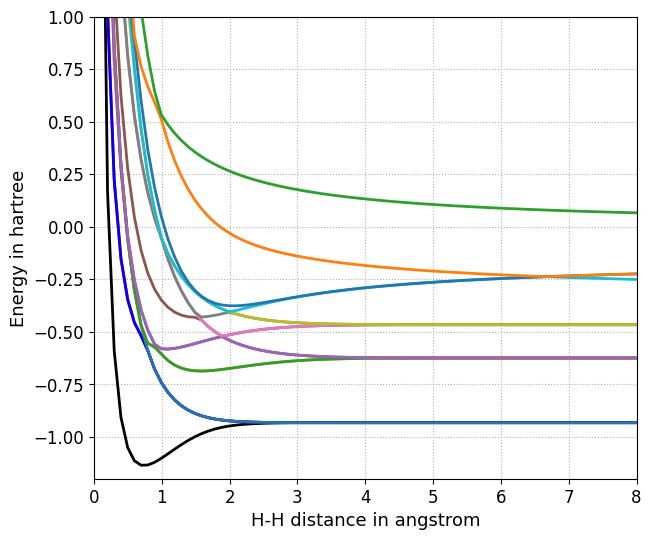

In [32]:
plt.figure(figsize=(7.0, 6.0))

xmin_plot, xmax_plot = 0, 8
ymin_plot, ymax_plot = -1.2, 1.0
plt.xlim(xmin_plot, xmax_plot)
plt.ylim(ymin_plot, ymax_plot)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel("H-H distance in angstrom", fontsize=13)
plt.ylabel("Energy in hartree", fontsize=13)

plt.plot(r_list, energy_diag_g_list, color="black", linestyle="solid", linewidth=2)
plt.plot(r_list, energy_diag_e1_list, color="red", linestyle="solid", linewidth=2)
plt.plot(r_list, energy_diag_e2_list, color="blue", linestyle="solid", linewidth=2)
plt.plot(r_list, energy_diag_e3_list, linestyle="solid", linewidth=2)
plt.plot(r_list, energy_diag_e4_list, linestyle="solid", linewidth=2)
plt.plot(r_list, energy_diag_e5_list, linestyle="solid", linewidth=2)
plt.plot(r_list, energy_diag_e6_list, linestyle="solid", linewidth=2)
plt.plot(r_list, energy_diag_e7_list, linestyle="solid", linewidth=2)
plt.plot(r_list, energy_diag_e8_list, linestyle="solid", linewidth=2)
plt.plot(r_list, energy_diag_e9_list, linestyle="solid", linewidth=2)
plt.plot(r_list, energy_diag_e10_list, linestyle="solid", linewidth=2)
plt.plot(r_list, energy_diag_e11_list, linestyle="solid", linewidth=2)
plt.plot(r_list, energy_diag_e12_list, linestyle="solid", linewidth=2)
plt.plot(r_list, energy_diag_e13_list, linestyle="solid", linewidth=2)
plt.plot(r_list, energy_diag_e14_list, linestyle="solid", linewidth=2)
plt.plot(r_list, energy_diag_e15_list, linestyle="solid", linewidth=2)

plt.grid(linestyle='dotted')
#plt.legend(loc='best', fontsize=13)
plt.show()

In [4]:
basis = "sto-3g"
multiplicity = 1
charge = 0
distance  = 1.5
geometry = [["Li", [0,0,0]],["H", [0,0,distance]]]
description  = "tmp"
molecule = MolecularData(geometry, basis, multiplicity, charge, description)
molecule = run_pyscf(molecule,run_scf=1,run_fci=1)
n_qubit = molecule.n_qubits
n_electron = molecule.n_electrons
fermionic_hamiltonian = get_fermion_operator(molecule.get_molecular_hamiltonian())
jw_hamiltonian = jordan_wigner(fermionic_hamiltonian)
jw_hamiltonian.compress()

In [7]:
sparse_hamiltonian = get_sparse_operator(jw_hamiltonian)
energy, state = get_ground_state(sparse_hamiltonian)
print(energy)
#print('Ground state energy before rotation is {} Hartree.\n'.format(energy))

-7.882362286798752


In [3]:
jw_matrix = get_sparse_operator(jw_hamiltonian)
eigenenergies, eigenvecs = np.linalg.eigh(jw_matrix.toarray())
print(eigenenergies)
print(eigenenergies[0], molecule.fci_energy)

In [9]:
basis = "sto-3g"  #basis set
multiplicity = 1  #spin multiplicity
charge = 0        #total charge for the molecule
description = "tmp"

r_list = []
energy_list = []
energy_diag_list = []
energy_diag_e1_list = []
energy_diag_e2_list = []
energy_diag_e3_list = []
energy_diag_e4_list = []
energy_hf_list = []

number = 51
for i in tqdm(range(number)):
    r = 0.1 + i*(4.0-0.1)/(number-1)
    geo = [("Li",(0,0,0)),("H", (0,0,r))]
    mol = MolecularData(geo, basis, multiplicity, charge, description)
    mol = run_pyscf(mol,run_scf=1,run_fci=1)
    n_qubit = mol.n_qubits
    n_electron = mol.n_electrons
    fermionic_hamiltonian = get_fermion_operator(mol.get_molecular_hamiltonian())
    jw_hamiltonian = jordan_wigner(fermionic_hamiltonian)
    jw_hamiltonian.compress()
    jw_matrix = get_sparse_operator(jw_hamiltonian)
    #eigenenergies, eigenvecs = np.linalg.eigh(jw_matrix.toarray())
    sparse_hamiltonian = get_sparse_operator(jw_hamiltonian)
    energy, state = get_ground_state(sparse_hamiltonian)
    
    r_list.append(r)
    energy_list.append(energy)

100%|██████████| 51/51 [09:08<00:00, 10.76s/it]


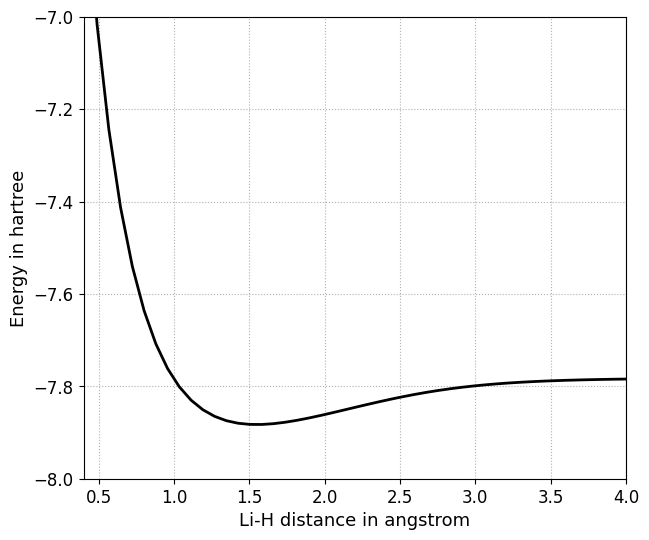

In [14]:
plt.figure(figsize=(7.0, 6.0))

xmin_plot, xmax_plot = 0.4, 4.0
ymin_plot, ymax_plot = -8.0, -7.0
plt.xlim(xmin_plot, xmax_plot)
plt.ylim(ymin_plot, ymax_plot)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel("Li-H distance in angstrom", fontsize=13)
plt.ylabel("Energy in hartree", fontsize=13)

plt.plot(r_list, energy_list, color="black", linestyle="solid", linewidth=2)

plt.grid(linestyle='dotted')
plt.show()